In [ ]:
"""
Created on Nov 12 2021

@author: Caroline Hixon


Shortcut Learning in NN using MedMNIST dataset 
    - Shortcut Learning (Geirhos et al, 2020) is found when data performs well with IID data but not OOD data
    - Shortcuts revealed when tested under slightly different circumstances 


Study Methodology
    Models:
        - Simple FC neural net (3 dense layers)
        - Baseline CNN (1 Conv2D, kernel size 3, relu + maxpool size 2)
        - CNN with BN and dropout (2 Conv2D layers, keneral size 3, relu + maxpool size 2, Batch Norm, dropout of 0.5)
        - ResNet (4 residual layers)
    Testing Environment:
        - No augmentation
        - Test set augmentation (random shifts, rotations)
        - Train and test set augmentation (random shifts, rotations)
        
Data
    - Pneumonia chest x-ray
    - Binary class (2)
    - 5,856 samples
    - Access to data: https://zenodo.org/record/6496656#.Ym7bZ-jMKHs

Results
    - Highest train acc: 97.77 from ResNet and train/test augmentation
    - Highest validation acc: 96.76 from CNN with dropout and no augmentation
    - Highest test acc: 86.38 from Baseline CNN and train/test augmentation
    
    
""" 


In [ ]:
# import statements

import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [33]:
num_classes = 2
input_shape = (28, 28, 1)
data_aug = True
both = True

pneu = 'Desktop/pneumoniamnist.npz'

def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['train_images'], f['train_labels']
        x_val, y_val = f['val_images'], f['val_labels'] 
        x_test, y_test = f['test_images'], f['test_labels']

        return (x_train, y_train), (x_val, y_val), (x_test, y_test)

(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data(pneu)

x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

if data_aug:
    datagen = ImageDataGenerator(rotation_range=90)
    datagen.fit(x_test)
    if both:
        datagen.fit(x_train)
        datagen.fit(x_val)

x_train shape: (624, 28, 28, 1)
4708 train samples
624 test samples


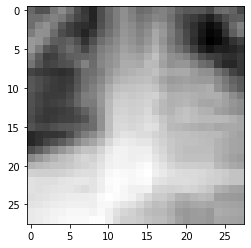

In [38]:
sample = 3
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

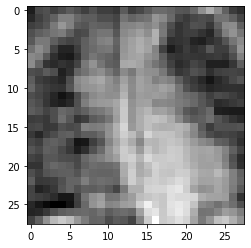

In [39]:
sample = 13
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

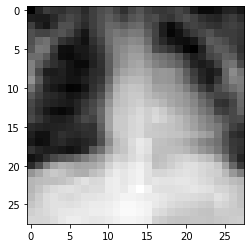

In [40]:
sample = 23
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

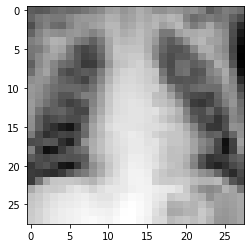

In [41]:
sample = 33
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
148/148 [==============================] - 1s 3ms/step - loss: 0.4751 - accuracy: 0.7999 - val_loss: 0.5961 - val_accuracy: 0.7519
Epoch 2/15
148/148 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8830 - v

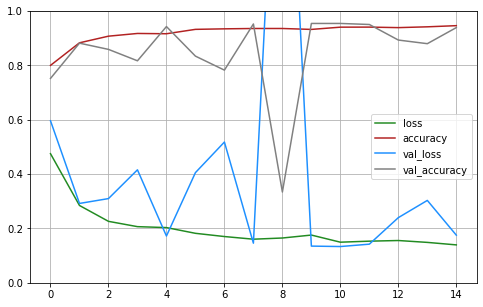

20/20 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8542
Model - NN - test loss: 40.64534604549408
Model - NN - test accuracy: 85.41666865348816


In [29]:
#BASIC SEQUENTIAL NN

modelNN = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') 
])

modelNN.summary()

modelNN.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
historyNN = modelNN.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val))

pd.DataFrame(historyNN.history).plot(figsize=(8,5),  color=('forestgreen', 'firebrick', 'dodgerblue', 'grey'))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

test_loss, test_acc = modelNN.evaluate(x_test, y_test)
print("Model - NN - test loss:", test_loss * 100)
print("Model - NN - test accuracy:", test_acc * 100)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 202       
Total params: 541,422
Trainable params: 541,422
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


C:\Users\Caroline\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


48/48 [==============================] - 2s 33ms/step - loss: 0.5399 - accuracy: 0.7343 - val_loss: 0.4328 - val_accuracy: 0.7557
Epoch 2/15
48/48 [==============================] - 2s 32ms/step - loss: 0.2785 - accuracy: 0.8796 - val_loss: 0.1892 - val_accuracy: 0.9237
Epoch 3/15
48/48 [==============================] - 1s 30ms/step - loss: 0.2389 - accuracy: 0.8991 - val_loss: 0.1820 - val_accuracy: 0.9389
Epoch 4/15
48/48 [==============================] - 1s 31ms/step - loss: 0.1948 - accuracy: 0.9180 - val_loss: 0.1994 - val_accuracy: 0.9084
Epoch 5/15
48/48 [==============================] - 1s 30ms/step - loss: 0.1621 - accuracy: 0.9352 - val_loss: 0.1456 - val_accuracy: 0.9485
Epoch 6/15
48/48 [==============================] - 1s 30ms/step - loss: 0.1485 - accuracy: 0.9397 - val_loss: 0.1424 - val_accuracy: 0.9466
Epoch 7/15
48/48 [==============================] - 1s 30ms/step - loss: 0.1574 - accuracy: 0.9363 - val_loss: 0.1346 - val_accuracy: 0.9523
Epoch 8/15
48/48 [======

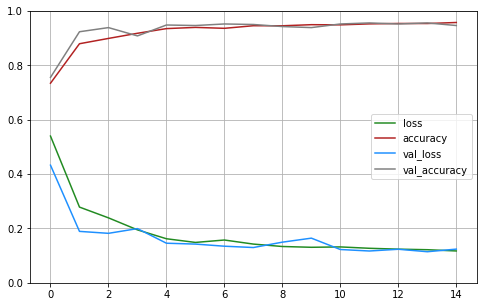

20/20 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.8638
Model - CNN - test loss: 50.01084804534912
Model - CNN - test accuracy: 86.37820482254028


In [30]:
# BASELINE CNN

epochs = 15
batch_size = 100

baseline_model = keras.Sequential([
    
        #first layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
    
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ])

baseline_model.summary()

opt = optimizers.SGD(lr=0.01, momentum=0.9)
baseline_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historyCNN = baseline_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

pd.DataFrame(historyCNN.history).plot(figsize=(8,5),  color=('forestgreen', 'firebrick', 'dodgerblue', 'grey'))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

test_loss, test_acc = baseline_model.evaluate(x_test, y_test)
print("Model - CNN - test loss:", test_loss * 100)
print("Model - CNN - test accuracy:", test_acc * 100)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 202       
Total params: 541,422
Trainable params: 541,422
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


C:\Users\Caroline\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


48/48 [==============================] - 4s 81ms/step - loss: 0.3488 - accuracy: 0.8895 - val_loss: 0.5298 - val_accuracy: 0.7424
Epoch 2/15
48/48 [==============================] - 4s 79ms/step - loss: 0.1580 - accuracy: 0.9397 - val_loss: 0.3618 - val_accuracy: 0.8263
Epoch 3/15
48/48 [==============================] - 4s 84ms/step - loss: 0.1527 - accuracy: 0.9420 - val_loss: 0.2600 - val_accuracy: 0.9084
Epoch 4/15
48/48 [==============================] - 4s 82ms/step - loss: 0.1306 - accuracy: 0.9494 - val_loss: 0.1916 - val_accuracy: 0.9370
Epoch 5/15
48/48 [==============================] - 3s 72ms/step - loss: 0.1302 - accuracy: 0.9531 - val_loss: 0.2027 - val_accuracy: 0.9179
Epoch 6/15
48/48 [==============================] - 3s 72ms/step - loss: 0.1194 - accuracy: 0.9558 - val_loss: 0.2022 - val_accuracy: 0.9275
Epoch 7/15
48/48 [==============================] - 3s 72ms/step - loss: 0.1075 - accuracy: 0.9596 - val_loss: 0.1351 - val_accuracy: 0.9561
Epoch 8/15
48/48 [======

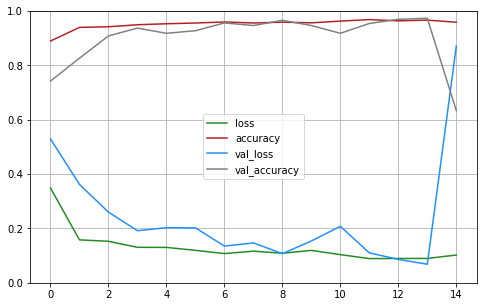

20/20 [==============================] - 0s 7ms/step - loss: 0.6247 - accuracy: 0.7548
Model - CNN - test loss: 62.46878504753113
Model - CNN - test accuracy: 75.4807710647583


In [31]:
# CNN with BN

epochs = 15
batch_size = 100

CNN_model = keras.Sequential([
    
        #first layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
    
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
    
    
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

CNN_model.summary()

opt = optimizers.SGD(lr=0.01, momentum=0.9)
CNN_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historyCNN2 = CNN_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

pd.DataFrame(historyCNN2.history).plot(figsize=(8,5),  color=('forestgreen', 'firebrick', 'dodgerblue', 'grey'))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

test_loss, test_acc = CNN_model.evaluate(x_test, y_test)
print("Model - CNN - test loss:", test_loss * 100)
print("Model - CNN - test accuracy:", test_acc * 100)



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 14, 14, 64)   3200        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_51 (BatchNo (None, 14, 14, 64)   256         conv2d_61[0][0]                  
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 14, 14, 64)   0           batch_normalization_51[0][0]     
____________________________________________________________________________________________

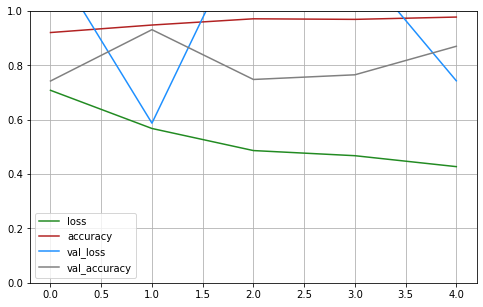

20/20 [==============================] - 1s 27ms/step - loss: 1.6490 - accuracy: 0.6939
Model - NN - test loss: 164.90308046340942
Model - NN - test accuracy: 69.39102411270142


In [32]:
epochs = 5
batch_size = 100
data_augmentation = False
img_size = 28
input_size = (28,28,1)
num_classes = 2
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = True

inputs = Input(shape=input_size)
x = Conv2D(num_filters, padding='same', 
           kernel_initializer='he_normal', 
           kernel_size=7, strides=2,
           kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

if use_max_pool:
    x = MaxPooling2D(pool_size=3,padding='same', strides=2)(x)
    num_blocks =3

for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
            
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   strides=strides,
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        
        y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(y)
        y = BatchNormalization()(y)
        
        if is_first_layer_but_not_first_block:
            x = Conv2D(num_filters,
                       kernel_size=1,
                       padding='same',
                       strides=2,
                       kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(x)
       
        x = keras.layers.add([x, y])
        x = Activation('relu')(x)

    num_filters = 2 * num_filters

# Add classifier on top.
x = AveragePooling2D()(x)
y = Flatten()(x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(y)

# Instantiate and compile model.
modelrn = Model(inputs=inputs, outputs=outputs)
modelrn.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
modelrn.summary()

historyRN = modelrn.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True
              )

pd.DataFrame(historyRN.history).plot(figsize=(8,5),  color=('forestgreen', 'firebrick', 'dodgerblue', 'grey'))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

test_loss, test_acc = modelrn.evaluate(x_test, y_test)
print("Model - NN - test loss:", test_loss * 100)
print("Model - NN - test accuracy:", test_acc * 100)